# Consumer Complaint Report

## Imports

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline

In [4]:
consumer_complaints = pd.read_csv('complaints_dec_2014.csv')

## Simple Graphs

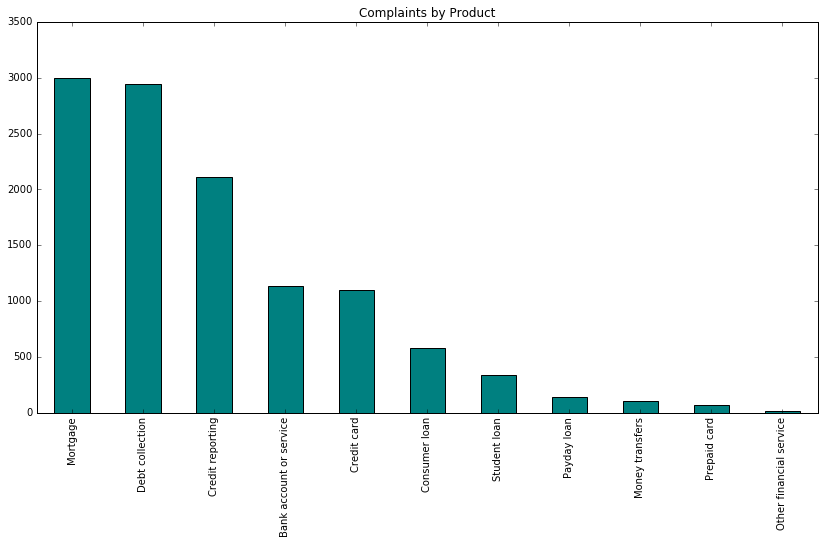

In [43]:
complaints_by_product = consumer_complaints['Product'].value_counts()
complaints_by_product.plot(kind='bar', figsize=(14, 7), color='teal', title='Complaints by Product')

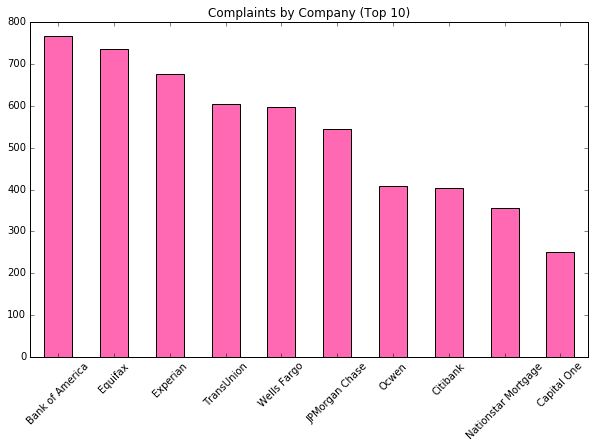

In [44]:
complaints_by_top_companies = consumer_complaints['Company'].value_counts()[:10]
complaints_by_top_companies.plot(kind='bar', rot=45, figsize=(10, 6), color='hotpink', title='Complaints by Company (Top 10)')

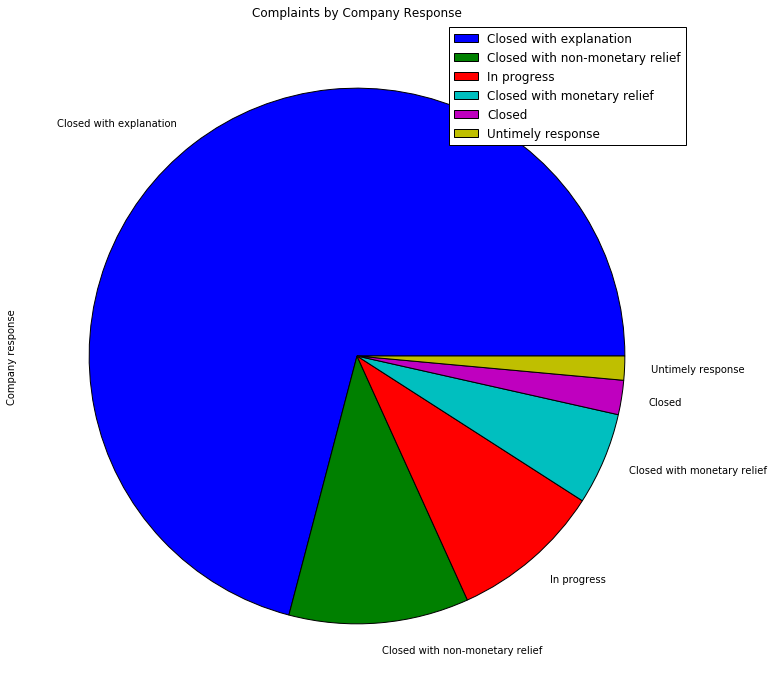

In [47]:
complaints_by_response = consumer_complaints['Company response'].value_counts()
complaints_by_response.plot(kind='pie', figsize=(12, 12), legend=True, title='Complaints by Company Response')

## Complex Graph
### Changing "Date sent to company" to datetime information, converting to day of the week

In [8]:
date_sent = consumer_complaints.pop('Date sent to company')

In [9]:
consumer_complaints.index = pd.to_datetime(date_sent, format='%m/%d/%Y')

In [10]:
consumer_complaints['Day of Week Sent'] = consumer_complaints.index.dayofweek

### Finding the unique days of the week and their respective averages

In [37]:
day_avg = []
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for item, day in zip(range(7), days):
    x = consumer_complaints[consumer_complaints['Day of Week Sent'] == item].index.value_counts()
    day_avg.append((day, sum(x)/len(x)))

In [40]:
complaints_by_day_of_week = pd.DataFrame(day_avg)

In [41]:
cbd = complaints_by_day_of_week.set_index(0)
cbd

,1
0,
Monday,326.125
Tuesday,306.250
Wednesday,317.500
Thursday,181.125
Friday,217.750
Saturday,85.800
Sunday,81.000


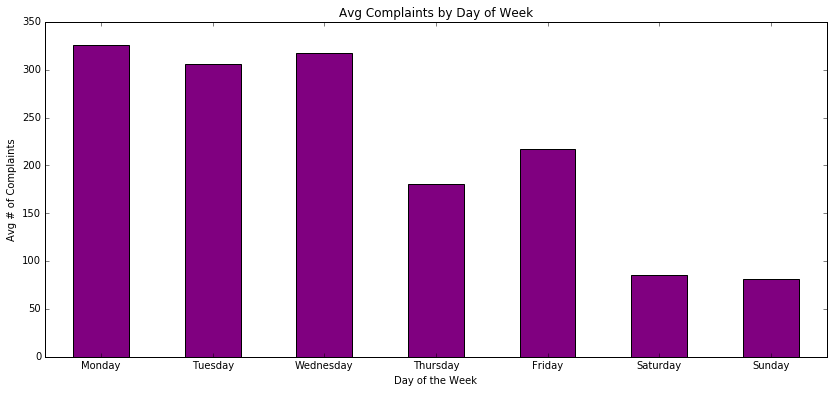

In [42]:
avgperdayplot = cbd.plot(kind='bar', title='Avg Complaints by Day of Week', color='purple', legend=False, rot=0, figsize=(14, 6))
avgperdayplot.set_xlabel('Day of the Week')
avgperdayplot.set_ylabel('Avg # of Complaints')

## Adding State Population Data

In [56]:
census = pd.read_csv('census.csv')

In [80]:
type(census['POPESTIMATE2015'])

pandas.core.series.Series

In [87]:
census2015 = DataFrame(index=census.index, data=census[['NAME', 'POPESTIMATE2015']])

In [89]:
census2015

,NAME,POPESTIMATE2015
0,United States,321418820
1,Northeast Region,56283891
2,Midwest Region,67907403
3,South Region,121182847
4,West Region,76044679
5,Alabama,4858979
6,Alaska,738432
7,Arizona,6828065
8,Arkansas,2978204
9,California,39144818
